Data **Collection**

In [ ]:
pip install pandas nltk


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving HateSpeechDataset.csv to HateSpeechDataset.csv
User uploaded file "HateSpeechDataset.csv" with length 201991397 bytes


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Display the first few rows of the dataframe
df.head()


,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [ ]:
df.describe()

,Content,Label,Content_int
count,440906,440906,440906
unique,417561,3,417561
top,content,0,"[146715, 7139, 146714]"
freq,7,361594,7


In [ ]:
df.tail()

,Content,Label,Content_int
440901,crash another movie from left field i have to ...,0,"[146715, 1780, 649, 1673, 347, 701, 1702, 80, ..."
440902,i why do not you debate first before starting ...,0,"[146715, 80, 186, 340, 76, 26, 6407, 566, 2608..."
440903,removal of i reverted the removal of the above...,0,"[146715, 18731, 1, 80, 48182, 3, 18731, 1, 3, ..."
440904,i have unblocked you eddie as i discussed on u...,0,"[146715, 80, 87, 20515, 26, 10684, 273, 80, 95..."
440905,you have the ability to delete that revision a...,0,"[146715, 26, 87, 3, 12795, 7, 3358, 28, 3938, ..."


In [ ]:
!pip install nltk beautifulsoup4


Data Cleaning

In [ ]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (only the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a single string
    clean_text = ' '.join(words)

    return clean_text

# Assuming your text data is in a column named 'text'
# Apply the cleaning function to the 'text' column and create a new 'cleanText' column
df['cleanText'] = df['Content'].apply(clean_text) # Change 'Content' to the actual column name containing text data

# Display the first few rows of the cleaned dataframe
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Content,Label,Content_int,cleanText
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


In [ ]:
import re

# Example of a function to clean text data
def clean_text(Content):
    Content = Content.lower()  # Convert to lowercase
    Content = re.sub(r'\d+', '', Content)  # Remove numbers
    Content = re.sub(r'\s+', ' ', Content)  # Remove extra spaces
    Content = re.sub(r'[^\w\s]', '', Content)  # Remove punctuation
    return Content

# Apply the cleaning function to the 'Content' column
df['Content'] = df['Content'].apply(clean_text)

# Remove duplicates
df.drop_duplicates(subset='Content', inplace=True)

# Drop rows with missing values in 'Content' or 'Label' columns
df.dropna(subset=['Content', 'Label'], inplace=True)

# Display the first few rows of the cleaned dataset
print(df.head())


                                             Content Label  \
0  denial of normal the con be asked to comment o...     1   
1  just by being able to tweet this insufferable ...     1   
2  that is retarded you too cute to be single tha...     1   
3  thought of a real badass mongol style declarat...     1   
4                                afro american basho     1   

                                         Content_int  
0  [146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...  
1  [146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...  
2  [146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...  
3  [146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...  
4                       [146715, 46, 47, 48, 146714]  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


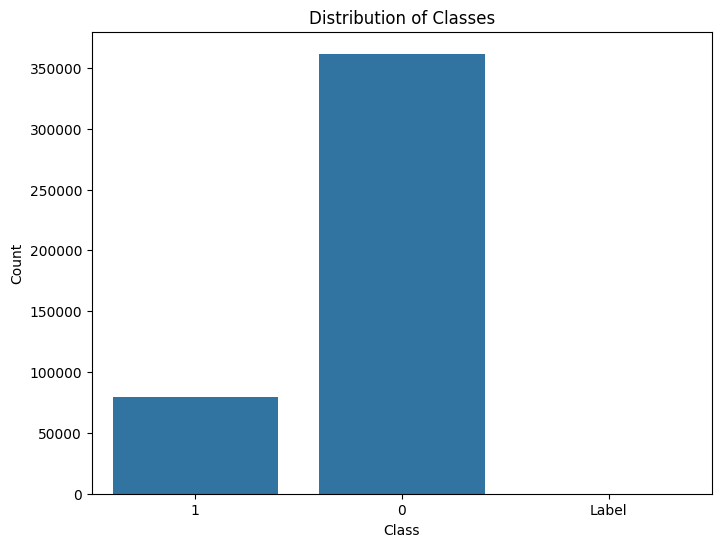

In [ ]:
# Install required libraries
!pip install matplotlib seaborn wordcloud

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import nltk

nltk.download('punkt')

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()




In [ ]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

# Download the cleaned dataset
from google.colab import files
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving cleaned_dataset.csv to cleaned_dataset (1).csv
User uploaded file "cleaned_dataset (1).csv" with length 188978124 bytes


**Data Encoding Methods**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset
df.head(10)


<ipython-input-3-f7239afc7b57>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_dataset.csv')


,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"
5,yeah retard haha,1,"[146715, 49, 13, 50, 146714]"
6,the ching chong chung stuff,1,"[146715, 3, 51, 52, 53, 54, 146714]"
7,the dead what a slut still warm when she tweet...,1,"[146715, 3, 55, 56, 24, 57, 58, 59, 60, 61, 62..."
8,let your tweets be harmless it will not affect...,1,"[146715, 71, 72, 73, 5, 74, 63, 75, 76, 77, 78..."
9,these latinos who have a problem with immigrat...,1,"[146715, 85, 86, 67, 87, 24, 88, 89, 90, 91, 9..."


In [ ]:
df.describe()

,Content,Label,Content_int
count,417561,417561,417561
unique,417561,5,417561
top,denial of normal the con be asked to comment o...,0,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
freq,1,200699,1


**Data** **Tokenization**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the text column
df['tokenized_text'] = df['Content'].apply(tokenize_text)

# Display the first few rows with tokenized text
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Content,Label,Content_int,tokenized_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...","[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...","[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...","[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...","[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]","[afro, american, basho]"


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# It is defined to toknize using spacy
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply the function to the text column
df['tokenized_text'] = df['Content'].apply(spacy_tokenize)

# Display the first few rows with tokenized text
df.head()


,Content,Label,Content_int,tokenized_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...","[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...","[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...","[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...","[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]","[afro, american, basho]"
